In [129]:
import pandas as pd
import numpy as np

In [130]:
data = pd.read_csv('Play by Play data.2021.csv')

In [131]:
#Cleaning data to get only the variables that I need.  
to_drop = ['GameId',
           'GameDate',
           'Quarter',
           'Minute',
           'Second',
           'DefenseTeam',
           'YardLine',
           'NextScore',
           'Description',
           'TeamWin',
           'SeasonYear',
           'Yards',
           'Formation',
           'IsRush',
           'IsPass',
           'IsIncomplete',
           'IsTouchdown',
           'PassType',
           'IsSack',
           'IsChallenge',
           'IsChallengeReversed',
           'Challenger',
           'IsMeasurement',
           'IsInterception',
           'YardLineDirection',
           'IsFumble',
           'IsPenalty',
           'IsTwoPointConversion',
           'IsTwoPointConversionSuccessful',
           'RushDirection',
           'YardLineFixed',
           'IsPenaltyAccepted',
           'PenaltyTeam',
           'IsNoPlay',
           'PenaltyType',
           'Unnamed: 10',
           'Unnamed: 12',
           'Unnamed: 16',
           'Unnamed: 17',
           'PenaltyYards']

data.drop(to_drop, inplace=True, axis=1)    

In [132]:
data.dropna()
data.drop(data[data['Down'] <= 3].index, inplace = True)


In [133]:
data.drop(data[data['PlayType'] == 'NO PLAY'].index, inplace = True)
data.drop(data[data['PlayType'] == 'QB KNEEL'].index, inplace = True)
data.drop(data[data['PlayType'] == 'EXCEPTION'].index, inplace = True)
data.drop(data[data['PlayType'] == 'PENALTY'].index, inplace = True)
data.drop(data[data['PlayType'] == 'nan'].index, inplace = True)

In [134]:
data.replace(('PASS', 'RUSH', 'SCRAMBLE', 'FIELD GOAL', 'SACK', 'PUNT', 'FUMBLES'), (0, 1, 2, 3, 4, 5, 6), inplace=True) 

In [135]:
display(data)

,OffenseTeam,Down,ToGo,SeriesFirstDown,PlayType
7,KC,4,8,1,0.0
19,TEN,4,3,1,0.0
77,MIA,4,1,1,1.0
126,SEA,4,6,0,0.0
133,PHI,4,6,0,5.0
...,...,...,...,...,...
42743,DET,4,18,0,3.0
42748,DET,4,2,0,1.0
42765,MIN,4,4,0,5.0
42769,CIN,4,9,0,5.0


#1:Describe what the 5 variables mean in the dataset (Chapter 1).

The five variables in my dataset are the offensive team, the current down, how many yards to go for first down, 
if the play resulted in a first down, and what the play type was. Down, ToGo, SeriesFirstDown are numeric variables. 
OffenseTeam and PlayType are Categorical variables. I also changed the PlayType column to numeric so i could use it to compare. 
PASS= 0
RUSH= 1
PUNT= 2
FIELD GOAL= 3
SACK= 4
SCRAMBLE= 5
FUMBLES= 6

#2: Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

In [136]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [137]:
import thinkstats2
import thinkplot

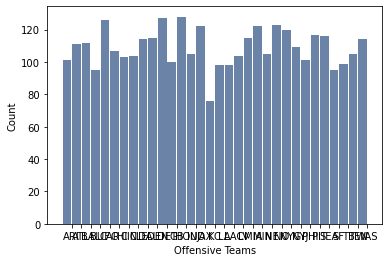

In [138]:
hist = thinkstats2.Hist(data.OffenseTeam, label='OffenseTeam')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Offensive Teams', ylabel='Count')

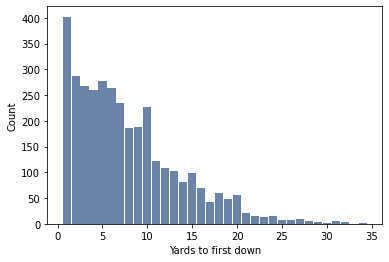

In [139]:
hist = thinkstats2.Hist(data.ToGo, label='ToGo')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Yards to first down', ylabel='Count')

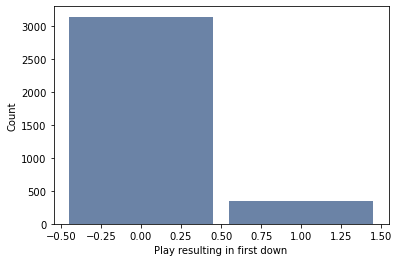

In [140]:
hist = thinkstats2.Hist(data.SeriesFirstDown, label='SeriesFirstDown')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Play resulting in first down', ylabel='Count')

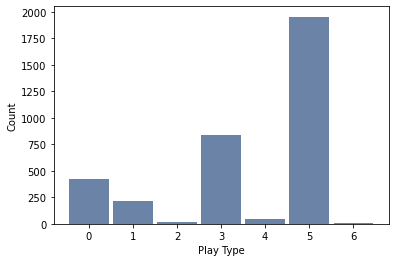

In [141]:
hist = thinkstats2.Hist(data.PlayType, label='PlayType')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Play Type', ylabel='Count')

#3:Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [142]:
mean_down=data.Down.mean()
mean_togo=data.ToGo.mean()
mean_seriesfirstdown=data.SeriesFirstDown.mean()
mean_playtype=data.PlayType.mean()

In [143]:
mean_down

4.0

In [144]:
mean_togo

7.773157441927158

In [145]:
mean_seriesfirstdown

0.09807857757384571

In [146]:
mean_playtype

3.6462994836488813

#4:Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [147]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

In [148]:
import first

In [149]:
passrun_play = data[data.PlayType <= 1]
other_play = data[data.PlayType >= 2]

In [150]:
pmf = thinkstats2.Pmf(passrun_play.PlayType, label="Run/Pass")
pmf2 = thinkstats2.Pmf(other_play.PlayType, label="Other Result")

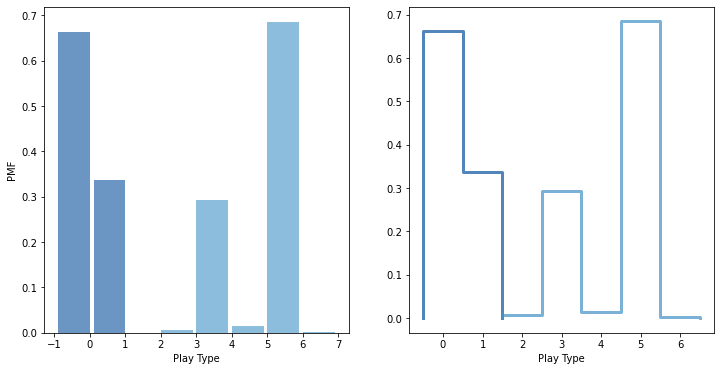

In [151]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align="right")
thinkplot.Hist(pmf2, align="left")
thinkplot.Config(xlabel="Play Type", ylabel="PMF")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf, pmf2])
thinkplot.Config(xlabel="Play Type")

#5: Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

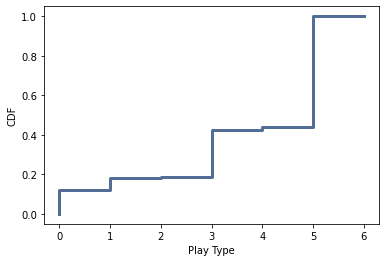

In [152]:
cdf = thinkstats2.Cdf(data.PlayType, label='PlayType')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Play Type', ylabel='CDF')

This CDF shows me that almost 80% of 4th down plays are either a run, pass, or punt.

In [153]:
cdf.Prob(2)

0.18732071141709697

This CDF shows me that roughly 18.7% of 4th down plays are attempted to convert for a first down. 

#6:Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

Mean, Var 7.632348639953203 29.63874297760199
Sigma 5.444147589623373


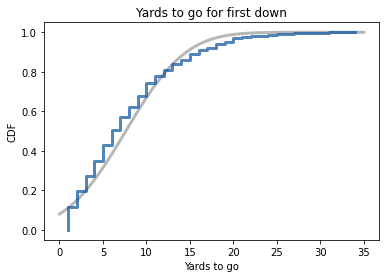

In [154]:
mu, var = thinkstats2.TrimmedMeanVar(data.ToGo, p=0.01)
print("Mean, Var", mu, var)

sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=35)

thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf2 = thinkstats2.Cdf(data.ToGo, label="data")
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf2)
thinkplot.Config(title="Yards to go for first down", xlabel="Yards to go", ylabel="CDF")

#7:Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

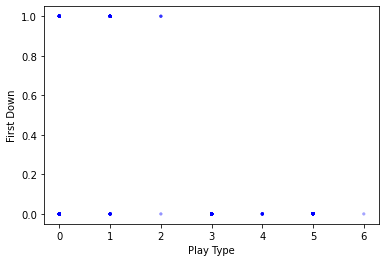

In [155]:
thinkplot.Scatter(data.PlayType, data.SeriesFirstDown, alpha=0.1, s=10)
thinkplot.Config(xlabel='Play Type',
                 ylabel='First Down',
                 legend=False)

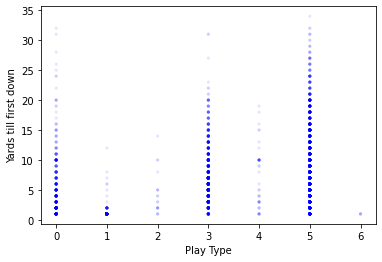

In [156]:
thinkplot.Scatter(data.PlayType, data.ToGo, alpha=0.1, s=10)
thinkplot.Config(xlabel='Play Type',
                 ylabel='Yards till first down',
                 legend=False)

What these scatter plots show me is that the only plays that truly acieved a first down are Run, Pass, and Scramble. I find the second scatter plot even more informative because it shows the correlation between less yards and acheiving a first down. 

#8:Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [157]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [158]:
data2 = data.PlayType.values, data.SeriesFirstDown.values
ht = CorrelationPermute(data2)
pvalue = ht.PValue()
pvalue

0.0

#9: For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [159]:
import statsmodels.formula.api as smf

In [160]:
formula = 'SeriesFirstDown ~ PlayType'
model = smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SeriesFirstDown   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          5.09e-315
Time:                        13:15:09   Log-Likelihood:                0.61977
No. Observations:                3486   AIC:                             2.760
Df Residuals:                    3484   BIC:                             15.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4519      0.009     48.448      0.000       0.434       0.470
PlayType      -0.0970      0.002    -42.225      0.000      -0.102      -0.093
==============================================================================
Omnibus:                      520.401   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              975.529
Skew:                           0.936   Prob(JB):                    1.47e-212
Kurtosis:                       4.791   Cond. No.                         9.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""